ChEn-3170: Computational Methods in Chemical Engineering Spring 2023 UMass Lowell; Prof. V. F. de Almeida **01Feb23**

# Laboratory Work 03 (03Feb23)
$
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Cmtrx}{\boldsymbol{\mathsf{C}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Qmtrx}{\boldsymbol{\mathsf{Q}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\yvec}{\boldsymbol{\mathsf{y}}}
  \newcommand{\zvec}{\boldsymbol{\mathsf{z}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\onevec}{\boldsymbol{\mathsf{1}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\abs}{abs}
$

### Name: `Your Name`

### Rubric for each assignment: 

|      Context       |  Points |
|:----------------------------|:-------:|
| Precision of the answer     |  80%    |
| Answer Markdown readability |  10%    |
| Code readability            |  10%    |
    

### <font color="red">Guidance:</font>

+  <font color="red"> 
    Save your work frequently to a file locally to your computer.
   </font>
+  <font color="red">
    During your work and before submitting the final version do:</span> Kernel -> Restart & Run All<font color="red">, to verify your notebook runs correctly.
   </font>
+  <font color="red">
    Save your file again.
   </font>
+  <font color="red">
    Upload the notebook file in the Blackboard submission portal as: 
   </font> 
   
   **lastname-firstname-labwork-xx.ipynb**
   
   NB: Please note lowercase.

---
### Table of Assignments<a id="toa"></a>
* [Assignment 1 (20 pts)](#a1) Array data inspection
 - [1.1)](#a11)(2 pts) Read image data array.
 - [1.2)](#a12)(3 pts) Data type.
 - [1.3)](#a13)(5 pts) Calculate the diameter
 - [1.4)](#a14)(10 pts) Calculate the hot spot area
* [Assignment 2 (30 pts)](#a2) Stoichiometry.
 - [2.1)](#a21)(3 pts) Assemble $\Smtrx$.
 - [2.2)](#a22)(3 pts) Mass conservation.
 - [2.3)](#a23)(3 pts) Mole conservation.
 - [2.4)](#a24)(3 pts) Compute $\gvec$.
 - [2.5)](#a25)(3 pts) Compute $\yvec$.
 - [2.6)](#a26)(3 pts) Compute norm of $\yvec$.
 - [2.7)](#a27)(3 pts) Compute $\Amtrx$.
 - [2.8)](#a28)(3 pts) Compute $\Bmtrx$.
 - [2.9)](#a29)(3 pts) Explain $\Amtrx = \Bmtrx$.
 - [2.10)](#a210)(3 pts) Compute matrix subtraction.
* [Assignment 3 (20 pts)](#a3) Forward solver.
 - [3.1)](#a31)(5 pts) Code algorithm.
 - [3.2)](#a32)(5 pts) Demonstrate correctness.
 - [3.3)](#a33)(5 pts) Solve problem with $\Amtrx$.
 - [3.4)](#a34)(5 pts) Solve problem with $\Bmtrx$.
* [Assignment 4 (25 pts)](#a4) Backward solver.
 - [4.1)](#a41)(5 pts) Code algorithm.
 - [4.2)](#a42)(10 pts) Demonstrate correctness.
 - [4.3)](#a43)(5 pts) Solve problem with $\Amtrx$.
 - [4.4)](#a44)(5 pts) Solve problem with $\Bmtrx$.
* [Assignment 5 (5 pts)](#a5) Unclear points
---

## [<font color="blue">Assignment 1 (25 pts)</font>](#toa)<a id="a1"></a>

### <font color="blue">[1.1)](#toa)(2 pts) Write code to import this [image (fluid flow and heat transfer simulation on a symmetric sector of a nuclear reactor core cross section)](https://raw.githubusercontent.com/dpploy/chen-3170/master/notebooks/images/cp21.8-T.png) using its URL as an array and produce the plot below as close as possible.</font><a id="a11"></a> 

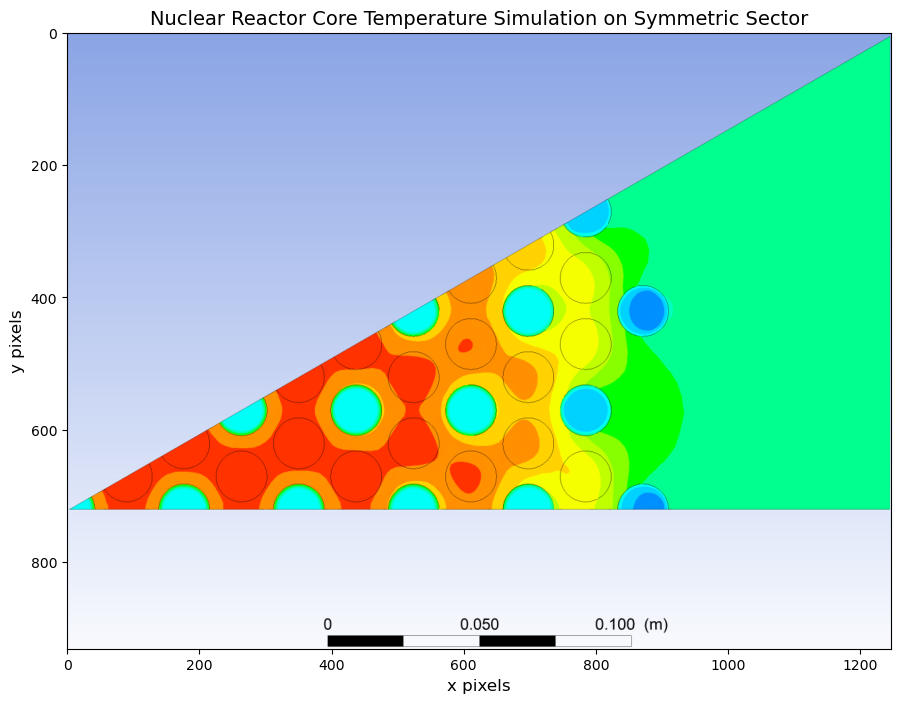

In [1]:
'''Code'''


### <font color="blue">[1.2)](#toa)(3 pts) What is the data type? Explain what it means.</font><a id="a12"></a> 

In [ ]:
'''Code'''


<font color="blue">**Explanation:**</font>

### <font color="blue">[1.3)](#toa)(5 pts) The circles in the image represent fuel pins and flow channels cross sections. Calculate the diameter in mm as best as possible and explain your work visually.</font><a id="a13"></a>

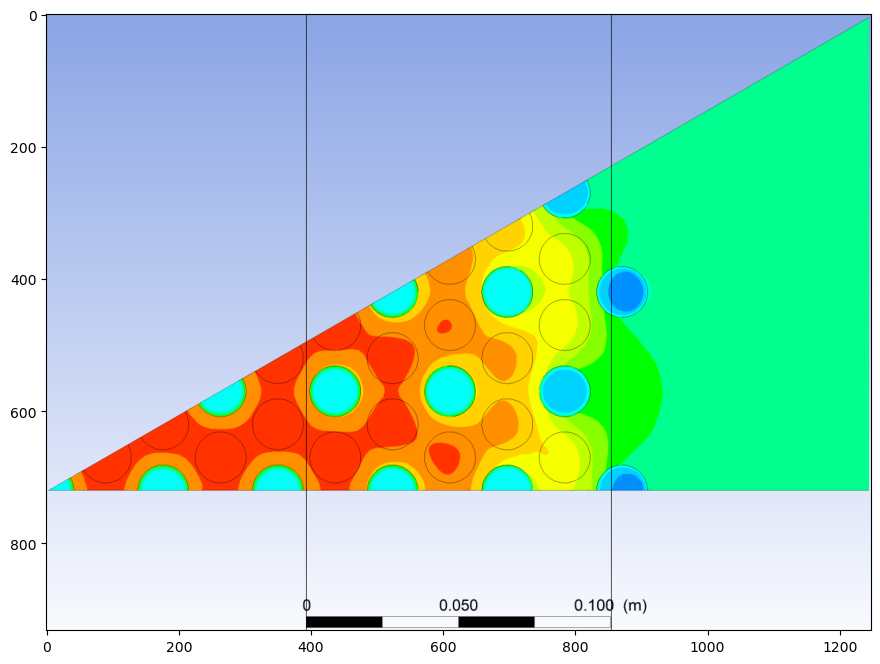

In [3]:
'''Diameter Code'''


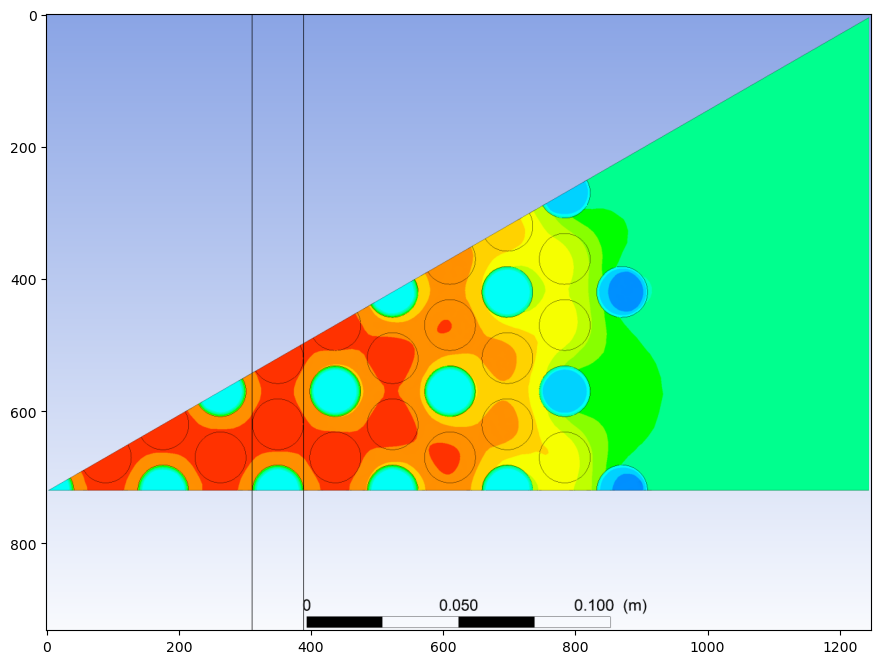

diameter = 16.92 [mm]


<font color="blue">**Explanation:**</font>

### <font color="blue">[1.4)](#toa)(10 pts) Calculate the area of the hot spot in the cross section and show this area as below. Also explain your work.</font><a id="a14"></a>

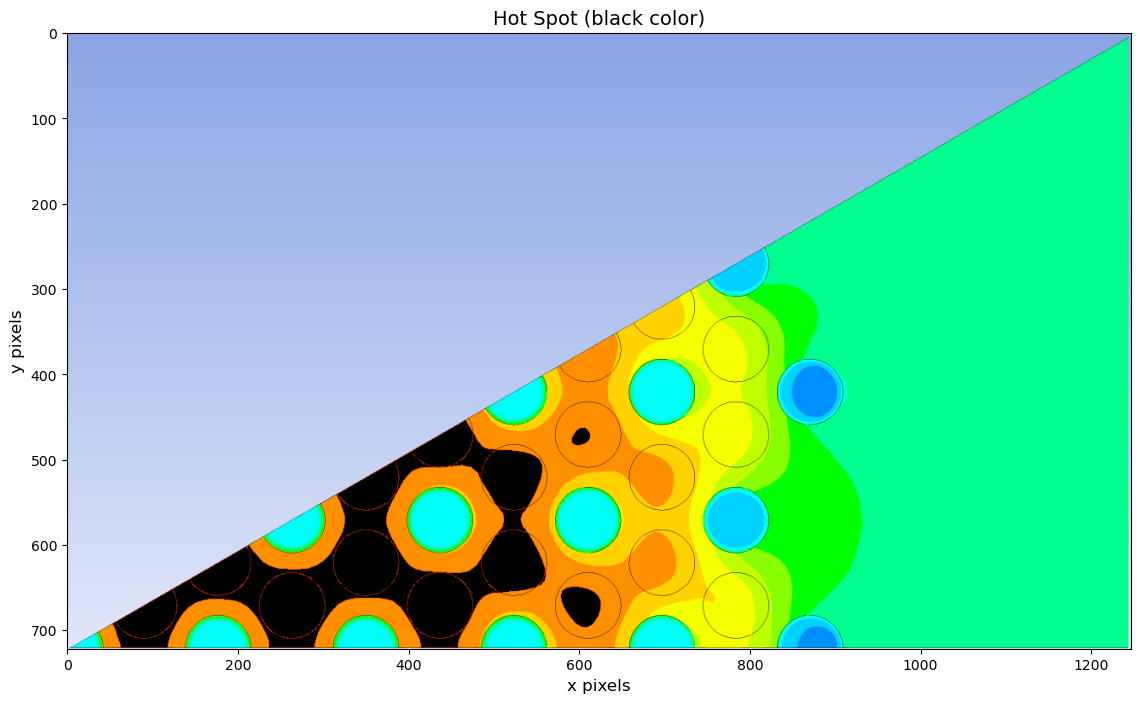

In [7]:
'''Area Code'''


Area of hot spot = 21.33 [cm^2]


<font color="blue">**Explanation:**</font>

## [<font color="blue">Assignment 2 (30 pts)</font>](#toa)<a id="a2"></a>

### <font color="blue">[2.1)](#toa)(3 pts) Consider the following reaction mechanism:</span><a id="a21"></a>

 Index | Reaction Mechanism     |         $K_x$        |
-------|------------------------|----------------------|
1|4 NH3 + 5 O2        <=> 4 NO  + 6 H2O | K_x = 2.5e+02 |
2|4 NH3 + 3 O2        <=> 2 N2  + 6 H2O | K_x = 1.8e+02 |
3|4 NH3 + 6 NO        <=> 5 N2  + 6 H2O | K_x = 1.099692e+02 |
4|2 NO  + 1 O2        <=> 2 NO2         | K_x = 1e+02 |
5|2 NO                <=> 1 N2  + 1 O2  | K_x = 8.485281e-01 |
6|1 N2  + 2 O2        <=> 2 NO2         | K_x = 1.178511e+02 |
7|4 NH3 + 4 NO + 1 O2 <=> 4 N2  + 6 H2O | K_x = 1.296e+02 |


### <font color="blue"> Build the stoichiometric matrix, $\Smtrx$, preserving the order of the reactions in the table, print the matrix elements, and show a plot as shown below. Print the list of species. Explain how you built your stoichiometric matrix.</font>

matrix shape = (7, 6)


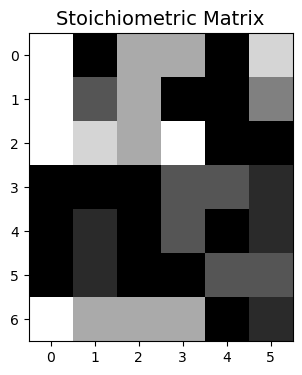

r0 :  4 NH3 + 5 O2        <=> 4 NO  + 6 H2O
r1 :  4 NH3 + 3 O2        <=> 2 N2  + 6 H2O
r2 :  4 NH3 + 6 NO        <=> 5 N2  + 6 H2O
r3 :  2 NO  + 1 O2        <=> 2 NO2
r4 :  2 NO                <=> 1 N2  + 1 O2
r5 :  1 N2  + 2 O2        <=> 2 NO2
r6 :  4 NH3 + 4 NO + 1 O2 <=> 4 N2  + 6 H2O
n_reactions = 7


In [9]:
'''Code'''


<font color="blue">**Explanation:**</font>

### <font color="blue">[2.2)](#toa)(3 pts) Using your stoichiometric matrix demonstrate that mass is conserved per reaction and also total mass is conserved. You must use a matrix equation for doing this. Explain your work including the formulae you used.</font><a id="a22"></a> 

In [ ]:
'''Code'''


<font color="blue">**Explanation:**</font>

### <font color="blue">[2.3)](#toa)(3 pts) Using your stoichiometric matrix investigate whether moles are conserved per reaction, and similarly whether total moles are conserved. State clearly your results. You must use a similar matrix formula as in 2.2). Explain your work.</font><a id="a23"></a> 

In [ ]:
'''Code'''


<font color="blue">**Explanation:**</font>

### <font color="blue">[2.4)](#toa)(3 pts) Given the following net reaction rate density vector in units of mols/(s ml)</font><a id="a24"></a>
    
$\rvec = \begin{pmatrix}
0.69035 \\  1.11066 \\ -0.13213 \\ -0.88666 \\  0.13489 \\ -0.50093 \\ -0.54989
 \end{pmatrix}
$.          
   
### <font color="blue"> Compute the species production rate density vector, $\gvec$, and show the results with 5 decimal places and state the units. Explain how you obtained the result and what it means.</font>

In [12]:
'''Code'''


g_vec [unit?] [ 6.71394e+00 -3.07000e-03 -4.47596e+00  7.25728e+00 -2.77518e+00 -4.21043e+00]


<font color="blue">**Explanation:**</font>

### <font color="blue">[2.5)](#toa)(3 pts) Compute the vector $\yvec = \Smtrx\,\gvec$ and print the results with up to 5 decimal places. Why should you get the same answer no matter the order of the $\gvec$ vector is?</font><a id="a25"></a> 

In [13]:
'''Code'''


y = [108.26875  70.81263  14.62845 -15.85449 -18.72806   2.87357  33.35651]


<font color="blue">**Explanation:**</font>

### <font color="blue">[2.6)](#toa)(3 pts) Compute the norm $\norm{\yvec}$ and print the result in exponential scientific format with 5 decimal places.</font><a id="a26"></a> 

In [14]:
'''Code'''


||y|| = 1.3665e+02


### <font color="blue">[2.7)](#toa)(3 pts) Compute the matrix $\Amtrx = \frac{1}{3}\,\Smtrx\Smtrx^\top$, print the result with up to 5 decimals precision. Why is this matrix the same when you change the order of the species in $\Smtrx$?</font><a id="a27"></a> 

In [15]:
'''Code'''


A =
 [[31.      22.33333  9.33333 -1.      -4.33333  3.33333 13.66667]
 [22.33333 21.66667 20.66667  1.      -0.33333  1.33333 21.     ]
 [ 9.33333 20.66667 37.66667  4.       5.66667 -1.66667 32.     ]
 [-1.       1.       4.       3.       1.       2.       3.     ]
 [-4.33333 -0.33333  5.66667  1.       2.      -1.       3.66667]
 [ 3.33333  1.33333 -1.66667  2.      -1.       3.      -0.66667]
 [13.66667 21.      32.       3.       3.66667 -0.66667 28.33333]]
shape = (7, 7)


<font color="blue">**Explanation:**</font>

### <font color="blue">[2.8)](#toa)(3 pts) Compute the matrix $\Bmtrx = \frac{1}{3}\,\Smtrx^\top\Smtrx$, print the result with up to 5 decimals precision. Why this matrix may not be the same as yours (see below)? When will it be the same as yours?</font><a id="a28"></a> 

In [16]:
'''Code'''


B =
 [[ 48.       22.      -32.      -12.        0.      -18.     ]
 [ 22.       15.66667 -14.66667 -16.       -0.66667  -2.33333]
 [-32.      -14.66667  21.33333   8.        0.       12.     ]
 [-12.      -16.        8.       25.33333  -1.33333  -5.33333]
 [  0.       -0.66667   0.       -1.33333   2.66667  -2.     ]
 [-18.       -2.33333  12.       -5.33333  -2.       13.66667]]
shape = (6, 6)


<font color="blue">**Explanation:**</font>

### <font color="blue">[2.9)](#toa)(3 pts) Is $\Amtrx = \Bmtrx$? Write a code for testing and printing the results. Explain.</font><a id="a29"></a> 

In [ ]:
'''Code'''


<font color="blue">**Explanation:**</font>

### <font color="blue">[2.10)](#toa)(3 pts) Compute $\Amtrx - \Amtrx^\top$. Explain the result.</font><a id="a210"></a> 

In [ ]:
'''Code'''


<font color="blue">**Explanation:**</font>

## [<font color="blue">Assignment 3 (20 pts)</font>](#toa)<a id="a3"></a>

### <font color="blue">[3.1)](#toa)(5 pts) Program a forward solver (*i.e.* write your code) for lower triangular system $\Lmtrx\,\xvec=\bvec$. The algorithm is as follows:</font><a id="a31"></a>

<font color="blue">
\begin{equation*}
  x_i = \Bigl(b_i - \sum\limits_{j=1}^{i-1} L_{i,j}\,x_j \Bigr)\,L^{-1}_{i,i} \ \ \forall \ \ i=1,\ldots,m ,
\end{equation*}
</font>

### <font color="blue">for $i$ and $j$ with offset 1. Recall that `NumPy` and `Python` have offset 0 for their sequence data types.</font>

In [19]:
'''Code'''


### <font color="blue">[3.2)](#toa)(5 pts) Demonstrate your forward solver in 3.1) is correct (do not compare against another solver) and provide an output example for $\Lmtrx$, $\bvec$, and $\xvec$ (use at least 7 unknowns).</font><a id="a32"></a>

In [ ]:
'''Code'''


### <font color="blue">[3.3)](#toa)(5 pts) Using the lower triangular portion of $\Amtrx$ as $\Lmtrx$, compute the solution of $\Lmtrx\xvec=\rvec$.</span><a id="a33"></a>

In [21]:
'''Code'''


x_vec = [ 0.02227  0.02831 -0.02456 -0.26482  0.3224   0.06607 -0.03552]


### <font color="blue">[3.4)](#toa)(5 pts) Using the lower triangular portion of $\Bmtrx$ as $\Lmtrx$, compute the solution of $\Lmtrx\xvec=\gvec$. Do you get the same solution as below? Explain?</span><a id="a34"></a>

In [22]:
'''Code'''


x_vec = [ 0.13987 -0.19661 -0.13517  0.27124 -0.95423 -0.07253]


<font color="blue">**Explanation:**</font> 

## [<font color="blue">Assignment 4 (25 pts)</font>](#toa)<a id="a4"></a>

### <font color="blue">[4.1)](#toa)(5 pts) Program a backward solver (*i.e.* write your code) for an upper triangular system $\Umtrx\,\xvec=\bvec$. The algorithm is as follows: </font>

<font color="blue">
\begin{equation*}
x_i = \Bigl(b_i - \sum\limits_{j=i+1}^{m} U_{i,j}\,x_j \Bigr)\,U^{-1}_{i,i} \ \ \forall \ \ i=m,\ldots,1 ,
\end{equation*}
</font>

### <font color="blue">for $i$ and $j$ with offset 1. Recall that `NumPy` and `Python` have offset 0 for their sequence data types. </font><a id="a41"></a>

In [23]:
'''Code'''

### <font color="blue">[4.2)](#toa)(10 pts) Demonstrate your code is correct (do not compare against another solver) and provide an output example for $\Umtrx$, $\bvec$, and $\xvec$ (use at least 7 unknowns). </font><a id="a42"></a> 

In [ ]:
'''Code'''


### <font color="blue">[4.3)](#toa)(5 pts) Using the upper triangular portion of $\Amtrx$ as $\Umtrx$, compute the solution of $\Umtrx\xvec=\rvec$.</font><a id="a43"></a>

In [25]:
'''Code'''


x_vec = [-0.00963  0.06897  0.0206  -0.16775  0.01738 -0.17129 -0.01941]


### <font color="blue">[4.4)](#toa)(5 pts) Using the upper triangular portion of $\Bmtrx$ as $\Umtrx$, compute the solution of $\Umtrx\xvec=\gvec$. Do you get the same solution as below? Explain.</font><a id="a44"></a>

In [26]:
'''Code'''


x_vec = [ 0.01408 -0.03071 -0.09452  0.15468 -1.27175 -0.30808]


<font color="blue">**Explanation:**</font> 

## [<font color="blue">Assignment 5 (5 pts)</font>](#toa)<a id="a5"></a>

### <font color="blue">Describe the most unclear point in the content presented so far. Then, make an effort to clarify the point on your own.</font>

**Description and troubleshooting:**